# Sentiment Analysis  

In [169]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from itertools import chain
from nltk import ngrams

In [77]:
df_r = pd.read_csv('C:/HomeDepot_reviews.csv')

In [78]:
df_r.head()

,userid,dateAdded,dateUpdated,name,asins,brand,categories,manufacturerNumber,date,dateSeen,didPurchase,doRecommend,reviwes_id,numHelpful,rating,text,title,username
0,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,Water Hyacinth Large Bowls Natural (Set of 4 1...,"B00DIHVMEA,B00EZ1ZTV0",HomeDepot,Kitchen Utensils sets,YBB12400R2,2017-11-12T00:00:00.000Z,2019-03-25T00:00:00Z,NaN,NaN,NaN,NaN,5,Great case to keep everything in its place! My...,Excellent product,qs341_5
1,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,Water Hyacinth Large Bowls Natural (Set of 4 1...,"B00DIHVMEA,B00EZ1ZTV0",HomeDepot,Kitchen Utensils sets,YBB12400R2,2014-06-14T05:00:00Z,2014-08-28T00:00:00Z,NaN,NaN,NaN,NaN,5,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita
2,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,Water Hyacinth Large Bowls Natural (Set of 4 1...,"B00DIHVMEA,B00EZ1ZTV0",HomeDepot,Kitchen Utensils sets,YBB12400R2,2019-02-15T00:00:00.000Z,2019-03-25T00:00:00Z,NaN,NaN,NaN,NaN,5,"A few dollars more, but I am boycotting HomeDepot",it was worth it,coldbloodblazing
3,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,Water Hyacinth Large Bowls Natural (Set of 4 1...,"B00DIHVMEA,B00EZ1ZTV0",HomeDepot,Kitchen Utensils sets,YBB12400R2,2014-06-19T05:00:00Z,2014-08-28T00:00:00Z,NaN,NaN,NaN,NaN,2,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub
4,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Corinth Framed Oil Painting,"B01E6AO69U,B00L9EPT8O",HomeDepot,Wall Art,B01E6AO69U,2018-10-15T00:00:00.000Z,"2019-04-24T00:00:00Z,2019-04-25T00:00:00Z",True,NaN,NaN,NaN,5,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous


In [80]:
df_r1 = df_r[['userid','name','categories','rating','text','title','username']] 

In [81]:
df_r1["Sentiment"] = 'Positive'

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [82]:
df_r1.head()

,userid,name,categories,rating,text,title,username,Sentiment
0,AVpe7nGV1cnluZ0-aG2o,Water Hyacinth Large Bowls Natural (Set of 4 1...,Kitchen Utensils sets,5,Great case to keep everything in its place! My...,Excellent product,qs341_5,Positive
1,AVpe7nGV1cnluZ0-aG2o,Water Hyacinth Large Bowls Natural (Set of 4 1...,Kitchen Utensils sets,5,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,Positive
2,AVpe7nGV1cnluZ0-aG2o,Water Hyacinth Large Bowls Natural (Set of 4 1...,Kitchen Utensils sets,5,"A few dollars more, but I am boycotting HomeDepot",it was worth it,coldbloodblazing,Positive
3,AVpe7nGV1cnluZ0-aG2o,Water Hyacinth Large Bowls Natural (Set of 4 1...,Kitchen Utensils sets,2,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,Positive
4,AVpfl8cLLJeJML43AE3S,Corinth Framed Oil Painting,Wall Art,5,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,Positive


In [83]:
#df_r1.loc[df_r1['rating'] > 3, ['Sentiment'] == 'Positive']

df_r1["Sentiment"] = df_r1["rating"].apply(lambda rating: "Positive" if rating > 3 else "Negative")
df_r1.loc[df_r1.rating == 3, 'Sentiment'] = "Neutral"

C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\gaura\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [84]:
df_r1.head(100)

,userid,name,categories,rating,text,title,username,Sentiment
0,AVpe7nGV1cnluZ0-aG2o,Water Hyacinth Large Bowls Natural (Set of 4 1...,Kitchen Utensils sets,5,Great case to keep everything in its place! My...,Excellent product,qs341_5,Positive
1,AVpe7nGV1cnluZ0-aG2o,Water Hyacinth Large Bowls Natural (Set of 4 1...,Kitchen Utensils sets,5,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,Positive
2,AVpe7nGV1cnluZ0-aG2o,Water Hyacinth Large Bowls Natural (Set of 4 1...,Kitchen Utensils sets,5,"A few dollars more, but I am boycotting HomeDepot",it was worth it,coldbloodblazing,Positive
3,AVpe7nGV1cnluZ0-aG2o,Water Hyacinth Large Bowls Natural (Set of 4 1...,Kitchen Utensils sets,2,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,Negative
4,AVpfl8cLLJeJML43AE3S,Corinth Framed Oil Painting,Wall Art,5,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,Positive
5,AVpfl8cLLJeJML43AE3S,Corinth Framed Oil Painting,Wall Art,5,"Pros: Got it for under 50, much impressive sou...",Much better sound sound than 2nd generation,Anonymous,Positive
6,AWK8z0pOIwln0LfXlSxH,Corinth Framed Oil Painting,Wall Art,5,Pros: I love the Alexa series so when this one...,Great addition to a living room,Nicholas M.,Positive
7,AWYAV-i9Iwln0LfXqrUq,Laundry Utility Washing Machine Shelf/Rack wit...,Laundry Baskets,4,"ASIDE FROM THE FACT THAT THE SCREEN IS SMALL, ...",ALEXA ENABLED DEVICE WITH SCREEN.,ECHO VIDEO,Positive
8,AWYAV-i9Iwln0LfXqrUq,Laundry Utility Washing Machine Shelf/Rack wit...,Laundry Baskets,5,"I wasn't sure I even wanted this item, but cau...",Gotta have this one!!,Wilbert,Positive
9,AWFFfd9KIwln0LfXiOe0,Steel Bundt Pan,Kitchen Utensils sets,5,Pros: Works good like Alexia Cons: setting it ...,Fire stick,John Z.,Positive


In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
import nltk

cleanupdata = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanupdata.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

df_r1["title_Clean"] = df_r1["title"].apply(cleanup)

train, test = train_test_split(df_r1, test_size=0.3)
print("%d --> Training data, %d --> Test data" % (len(train), len(test)))


10205 --> Training data, 4374 --> Test data


C:\Users\gaura\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Now we will apply Word Embedding Algorithms, of TFIDF and Count Vectorizer to create a matrix and then split data in testing and trainin

In [86]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [87]:
from wordcloud import WordCloud, STOPWORDS

# To cleanup stop words, add stop_words = STOPWORDS
# But it seems to function better without it
count_vect = CountVectorizer(min_df = 1, ngram_range = (1, 4))
X_train_counts = count_vect.fit_transform(train["title_Clean"])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["title_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

y_train = train["Sentiment"]
y_test = test["Sentiment"]

prediction = dict()

# Using wordcloud for visualization

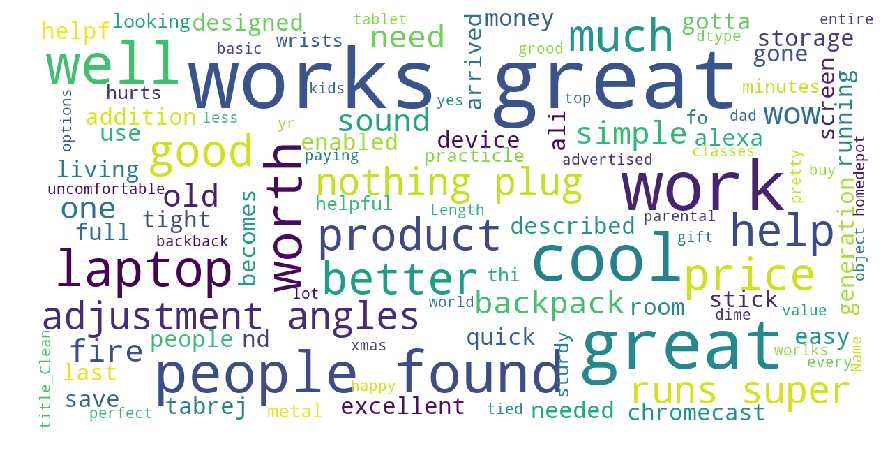

In [88]:
#Wordcloud depicting both positive as well as negative reviews
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df_r1["title_Clean"])

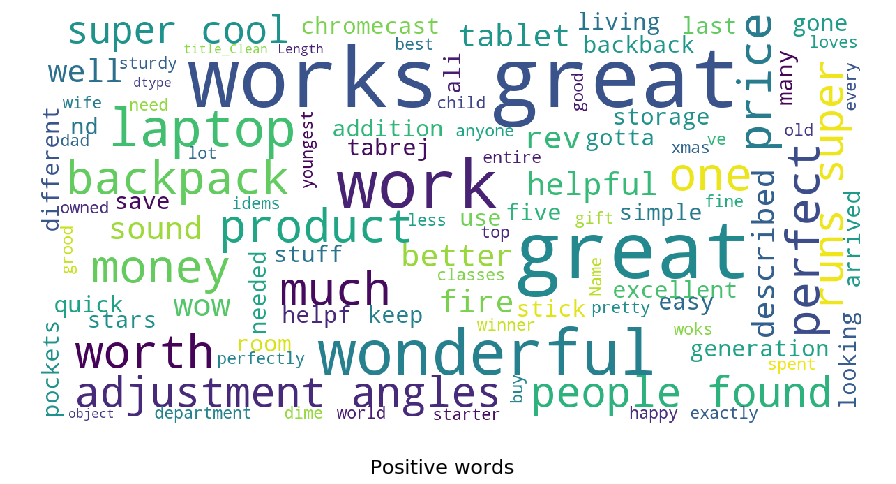

In [89]:
show_wordcloud(df_r1[df_r1.rating == 5]["title_Clean"], title = "Positive words")

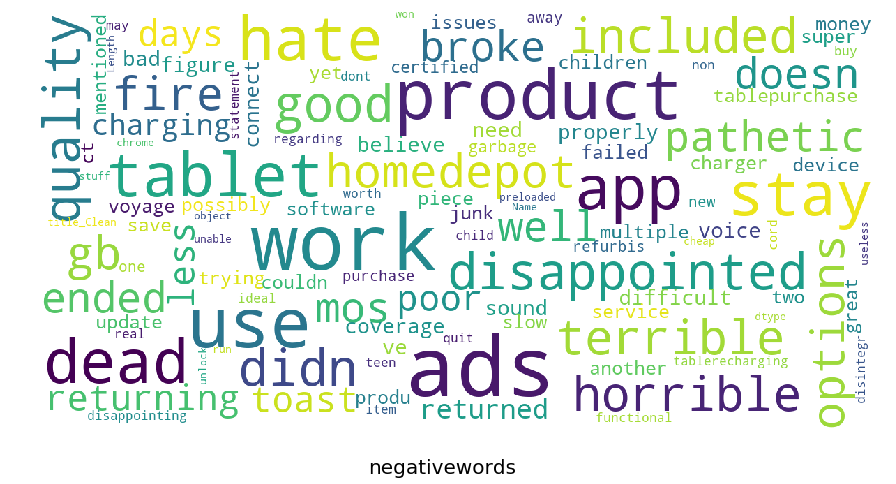

In [90]:
show_wordcloud(df_r1[df_r1.rating == 1] ["title_Clean"] , title = "negativewords")

In [91]:
df = df_r1[df_r1['rating'] != 3]
X = df['text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df['rating'].map(y_dict)

# Logistic Algorithm 

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# Features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('Number of train records: {}'.format(X_train.shape[0]))
    print('Number of test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('--- Top 20 positive words ---')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('--- Top 20 negative words ---')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# Features: 7477
Number of train records: 10500
Number of test records: 3501
Model Accuracy: 0.9874321622393601

--- Top 20 positive words ---
      Word  Coefficient
     loves     1.726498
      love     1.607462
     great     1.577655
     price     1.511950
      easy     1.434640
   perfect     1.422937
      nice     1.252260
    little     1.073105
        hd     1.057979
   awesome     1.054107
     enjoy     1.047646
 excellent     1.047060
      best     0.968122
    faster     0.950237
       far     0.939147
    family     0.877987
  learning     0.860812
    reader     0.837201
     value     0.830763
       old     0.815749

--- Top 20 negative words ---
         Word  Coefficient
         make    -1.198971
      freezes    -1.218557
 accidentally    -1.234134
     powerful    -1.248760
         hard    -1.274679
     facebook    -1.281480
     randomly    -1.303393
         week    -1.313094
     terrible    -1.510122
          way    -1.561065
         slow    -1.56120

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# model accurancy is 98%

In [93]:
#Accuracy is around 93%. However there are some insignificant words too which are of no use
#aseline accuracy

from sklearn.dummy import DummyClassifier
text_fit(X, y, c, DummyClassifier(),0)

# Features: 7477
Number of train records: 10500
Number of test records: 3501
Model Accuracy: 0.9511568123393316


In [94]:
#Logistic Regression model on TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# Features: 7477
Number of train records: 10500
Number of test records: 3501
Model Accuracy: 0.9748643244787204

--- Top 20 positive words ---
      Word  Coefficient
     great     4.166353
      love     3.249162
      easy     2.725529
     loves     2.705726
     price     2.524764
   perfect     1.820268
    tablet     1.579690
      nice     1.530828
      read     1.424862
     books     1.300768
       use     1.228834
      gift     1.227918
     works     1.222797
        hd     1.207886
       old     1.207209
       far     1.188158
   reading     1.173758
 excellent     1.165937
    little     1.140607
      best     1.074936

--- Top 20 negative words ---
         Word  Coefficient
          buy    -1.369917
     horrible    -1.470982
   compatible    -1.555923
    buffering    -1.607401
         hard    -1.628734
        tried    -1.636128
          bad    -1.819955
          way    -1.858888
      minutes    -1.905159
         didn    -1.934428
     exchange    -1.94488

In [95]:
#Logistic regression model on TFIDF + ngram

from nltk import ngrams
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# Features: 76262
Number of train records: 10500
Number of test records: 3501
Model Accuracy: 0.9740074264495858

--- Top 20 positive words ---
         Word  Coefficient
        great     3.524515
         love     2.723452
        loves     2.294417
         easy     2.193755
        price     1.964384
     easy use     1.449026
      perfect     1.404141
       tablet     1.320860
         read     1.139939
         nice     1.118486
        books     1.112943
          use     1.106580
         gift     1.082566
      reading     1.045195
        works     0.963758
          old     0.939184
 great tablet     0.907629
    excellent     0.840599
          far     0.829404
           hd     0.823300

--- Top 20 negative words ---
         Word  Coefficient
          pay    -1.122638
         hard    -1.157876
         work    -1.178112
          ads    -1.197486
          buy    -1.250862
          bad    -1.255834
      minutes    -1.265142
        tried    -1.305620
     exchange  

# Applying Multinomial Naïve Bayes learning method 

In [96]:
#Applying Multinomial Naive Bayes Algorithm 

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train_tfidf, y_train)
prediction['Multinomial'] = model.predict(X_test_tfidf)

 # Applying Bernoulli Naïve Bayes learning method

In [97]:
#Applying Bernoulli Naive Bayes Algorithm

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB().fit(X_train_tfidf, y_train)
prediction['Bernoulli'] = model.predict(X_test_tfidf)

# Applying Logistic Regression

In [98]:
#Applying Logistic Regression 

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)
logreg_result = logreg.fit(X_train_tfidf, y_train)
prediction['Logistic'] = logreg.predict(X_test_tfidf)

C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gaura\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


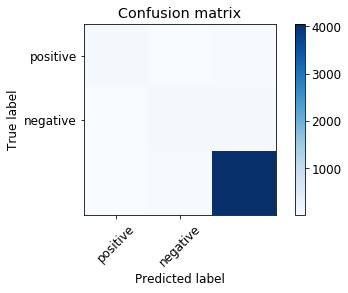

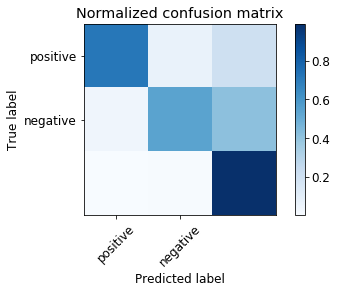

In [101]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# Compute confusion matrix
cm = confusion_matrix(y_test, prediction['Logistic'])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)    

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

In [102]:
#Lets predict whether the text samples are positive or negative 

def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "Not good")
test_sample(logreg, "Amazing Quality")
test_sample(logreg, "Terrible")

Sample estimated as NEGATIVE: negative prob 0.999892, positive prob 0.000106
Sample estimated as POSITIVE: negative prob 0.000000, positive prob 0.000000
Sample estimated as NEGATIVE: negative prob 0.999874, positive prob 0.000006


In [137]:

#This analysis will be carried out to focus on one specific user, on what he / she likes in terms of fine food, 
#based on the reviews he / she had given in the past. This can be expanded to all users later on.

df_user = df_r1.groupby(['userid','username']).agg({'rating':['count', 'mean']})
df_user.columns = df_user.columns.get_level_values(1)
df_user.columns = ['Score count', 'Score mean']
df_user = df_user.sort_values(by = 'Score count', ascending = False)
print(df_user.head(10))

                               Score count  Score mean
userid               username                         
AVqkIhxunnc1JgDc3kg_ Mike               11    4.272727
AVqVGWQDv8e3D1O-ldFr Mike                9    4.222222
AVqkIhxunnc1JgDc3kg_ Dave                7    4.428571
AVqVGWQDv8e3D1O-ldFr Dave                7    4.428571
AVphPmHuilAPnD_x3E5h Mike                6    4.666667
AVqVGWQDv8e3D1O-ldFr Eric                6    4.333333
AVph0EeEilAPnD_x9myq Mike                5    4.200000
AVqkIhxunnc1JgDc3kg_ Lisa                5    4.400000
                     Jason               5    4.400000
AVpfpK8KLJeJML43BCuD Mike                5    4.400000


In [ ]:
#The user with most frequent reviews are "CFH" with 448 reviews and average score 4.54. 
#Let's look at his review distribution:

def plot_user(UserId):
    df_1user = reviews1[reviews1['UserId'] == UserId]['Score']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (15,10), title = 'Score distribution of user {} review'.format(reviews1[reviews1['UserId'] == UserId]['ProfileName'].iloc[0]))

plot_user('A3OXHLG6DIBRW8')

In [134]:
print(df_user[(df_user['Score mean']<3.5) & (df_user['Score mean']>2.5)].head())

                                            Score count  Score mean
username title                                                     
Guinn    Good for movies and HomeDepot                4         3.0
Angelina It's an ok tablet for the price.             4         3.0
Cover    It's okay                                    3         3.0
CindyH   Confusing for me; returning                  3         3.0
DBG126   Great first tablet for beginners.            3         3.0


In [167]:
df_r1.groupby(['Sentiment' , 'name']).sum()

rating
Sentiment name                                                      
Negative  10 in. x 15 in. Cookie Pan                               4
          37 in. Black Hub Wall Mirror                            82
          Baby Barnyard 3-Piece Crib Set300-Thread Count ...      14
          Basket Weave 72 in. White Shower Curtain                 9
          Black Steel Bookcase                                     2
          Black and Grey Bungee Backpack                          39
          Classic 8-Cup Coffee Maker                               3
          Denim Solid Cotton Standard Sham                         4
          Fall Collection 18 in. Blue Surge                        6
          Family Size Toothbrush and Toothpaste Holder wi...       3
          Nylon Paddle Scraper Spatula                            35
          Simply Store 18-Piece Glass Storage Set with As...     154
          Steel Baking Sheet                                       4
          Steel Bundt Pan                                        198
          Steel Springform Cake Pan                                7
          Travelers Choice Versatile 5-Piece Purple Lugga...       5
          Water Hyacinth Large Bowls Natural (Set of 4 1/...       2
Neutral   10 in. x 15 in. Cookie Pan                               6
          37 in. Black Hub Wall Mirror                           261
          Baby Barnyard 3-Piece Crib Set300-Thread Count ...      30
          BackpackFall Collection 18 in. Blue Surge Backpack      18
          Basket Weave 72 in. White Shower Curtain                36
          Black Steel Bookcase                                     3
          Black and Grey Bungee Backpack                         174
          Classic 8-Cup Coffee Maker                               6
          Family Size Toothbrush and Toothpaste Holder wi...      18
          Nylon Paddle Scraper Spatula                            96
          Simply Store 18-Piece Glass Storage Set with As...     474
          Steel Bundt Pan                                        597
          Steel Springform Cake Pan                                9
          Travelers Choice Versatile 5-Piece Purple Lugga...       3
          Water Hyacinth Large Bowls Natural (Set of 4 1/...       3
Positive  10 in. x 15 in. Cookie Pan                             292
          37 in. Black Hub Wall Mirror                         12176
          Baby Barnyard 3-Piece Crib Set300-Thread Count ...    1035
          BackpackFall Collection 18 in. Blue Surge Backpack      86
          Basket Weave 72 in. White Shower Curtain              2518
          Black Steel Bookcase                                    79
          Black and Grey Bungee Backpack                        5926
          Classic 8-Cup Coffee Maker                             367
          Commercial Canvas Laundry Hamper Cart                   25
          Corinth Framed Oil Painting                             15
          DecoWall Gray 1/4 in. T x 5 in. W x Varying Len...      10
          Denim Solid Cotton Standard Sham                        65
          Fall Collection 18 in. Blue Surge                       50
          Family Size Toothbrush and Toothpaste Holder wi...     613
          Laundry Utility Washing Machine Shelf/Rack with...      13
          Nylon Paddle Scraper Spatula                          2715
          Restore 6 in. x 3 in. x 4 in. Glazed Ceramic So...      45
          Simply Store 18-Piece Glass Storage Set with As...   18238
          Steel Baking Sheet                                      45
          Steel Bundt Pan                                      18467
          Steel Springform Cake Pan                              798
          Travelers Choice Versatile 5-Piece Purple Lugga...     605
          Water Hyacinth Large Bowls Natural (Set of 4 1/...      70

In [148]:
df_r111 = df_r1.groupby('rating')

In [156]:
df_r1.to_csv('Documents\HomeDeopt_reviews1.csv')